In [ ]:
# import data
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel('Airbnb.xlsx')
df.head(5)



Saving Airbnb.xlsx to Airbnb.xlsx


,Listing id,Neighbourhood,Room type,Price per night,Listing available,Occupancy rate,Date,Calendar price,Calendar available
0,1001,Old Town,Private room,74,T,81,2025-10-19,74,f
1,1001,Old Town,Private room,74,T,81,2025-10-20,74,t
2,1001,Old Town,Private room,74,T,81,2025-10-21,74,t
3,1001,Old Town,Private room,74,T,81,2025-10-22,74,t
4,1001,Old Town,Private room,74,T,81,2025-10-23,74,t


In [ ]:
# Data cleaning
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Listing id          100 non-null    int64         
 1   Neighbourhood       100 non-null    object        
 2   Room type           100 non-null    object        
 3   Price per night     100 non-null    int64         
 4   Listing available   100 non-null    object        
 5   Occupancy rate      100 non-null    int64         
 6   Date                100 non-null    datetime64[ns]
 7   Calendar price      100 non-null    int64         
 8   Calendar available  100 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 7.2+ KB


,0
Listing id,0
Neighbourhood,0
Room type,0
Price per night,0
Listing available,0
Occupancy rate,0
Date,0
Calendar price,0
Calendar available,0


In [ ]:
df['Listing available'] = df['Listing available'].map({'T': True, 'F': False})


In [ ]:
# Convert Occupancy rate to decimal
df['Occupancy rate'] = df['Occupancy rate'] / 100


In [ ]:
df['Monthly Revenue'] = df['Price per night'] * df['Occupancy rate'] * 30

In [ ]:
# Calculate Average revenue
avg_revenue_neighbourhood = df.groupby('Neighbourhood')['Monthly Revenue'].mean().sort_values(ascending=False)

print(avg_revenue_neighbourhood)

Neighbourhood
Riverside    4747.50
Old Town     2061.45
Downtown      920.40
Name: Monthly Revenue, dtype: float64


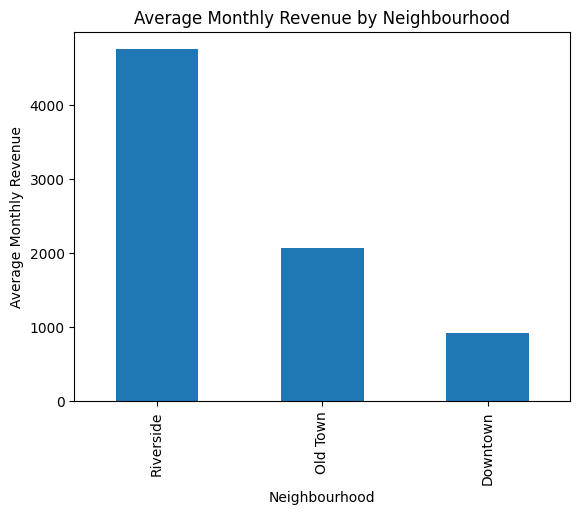

In [ ]:
# Visualize data
import matplotlib.pyplot as plt
avg_revenue_neighbourhood.plot(kind='bar')
plt.title('Average Monthly Revenue by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Monthly Revenue')
plt.show()

In [ ]:
# Calculate correlation
df[['Price per night', 'Occupancy rate', 'Monthly Revenue']].corr()


,Price per night,Occupancy rate,Monthly Revenue
Price per night,1.000000,0.352076,0.986381
Occupancy rate,0.352076,1.000000,0.499042
Monthly Revenue,0.986381,0.499042,1.000000


In [ ]:
# Calculate and compare average occupancy rate
occupancy_by_neighbourhood = df.groupby('Neighbourhood')['Occupancy rate'].mean().sort_values(ascending=False)
print(occupancy_by_neighbourhood)

Neighbourhood
Old Town     0.8275
Riverside    0.7500
Downtown     0.5200
Name: Occupancy rate, dtype: float64


In [ ]:
# Calculate and compare price per night
price_by_neighbourhood = df.groupby('Neighbourhood')['Price per night'].mean().sort_values(ascending=False)
print(price_by_neighbourhood)

Neighbourhood
Riverside    211.0
Old Town      82.5
Downtown      59.0
Name: Price per night, dtype: float64


Findings
In this project, I analyzed three neighbourhoods — Riverside, Old Town, and Downtown — to determine which area is the most profitable and what factors contribute to its performance.


*   Riverside generated the highest revenue overall ($4747.50). This is due to its high price per night ($211.0) and a solid occupancy rate of (0.75), making it the most profitable neighbourhood
*   Old Town recorded the second-highest revenue($2061.45). Although it has a higher occupancy rate (0.85) than Riverside, its lower price per night ($82.5) results in less revenue


*   Downtown has the lowest price per night ($59.0) and the lowest occupancy rate (0.52), resulting in the lowest monthly revenue of just ($920.40) among the three neighbourhoods

These findings suggest that price per night plays a more significant role in determining profitability than occupancy rate alone. Even with slightly lower occupancy, a higher price can generate greater revenue



